# Assignment 11: Matplotlib (Core Plot types and visualization)
- Author: Nihit Kumar
- Created: 2026-02-25

[Assignment Source Link](https://docs.google.com/document/d/1J_nAAqkcHRyJ7-6M3h46kls1ZugC0qIAcxc9KF6eAiY/edit?tab=t.0)

***



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

> **Task 1: Line Plot (Sales Trend)**

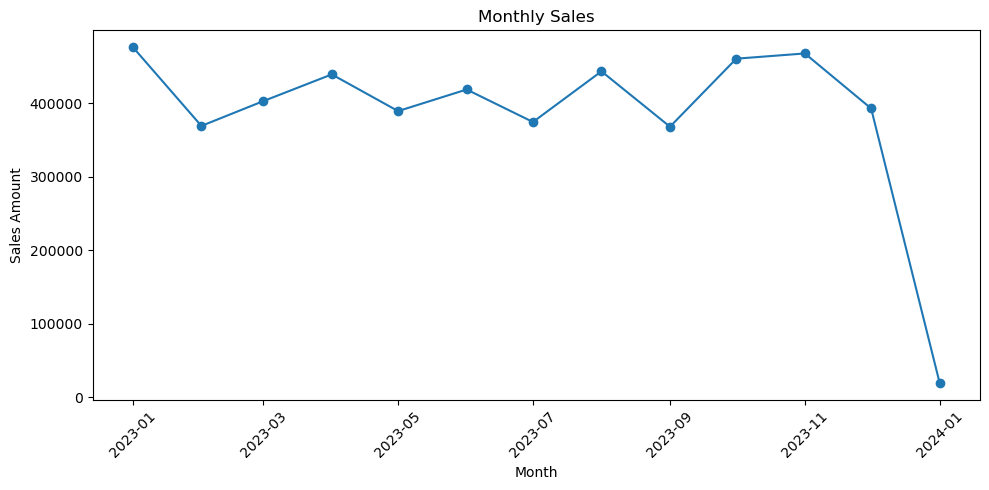

In [2]:
# Task 1: Line Graph to show the sales rate in different months
df = pd.read_csv('sales_data.csv')

df["Sale_Date"] = pd.to_datetime(df["Sale_Date"])
df["Month"] = df["Sale_Date"].dt.to_period("M").dt.to_timestamp()

monthly_sales = (
    df.groupby("Month", as_index=False)["Sales_Amount"].sum()
    .sort_values("Month")
)

plt.figure(figsize=(10, 5))
plt.plot(monthly_sales["Month"], monthly_sales["Sales_Amount"], marker="o")
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


> **Task 2: Scatter Plot**


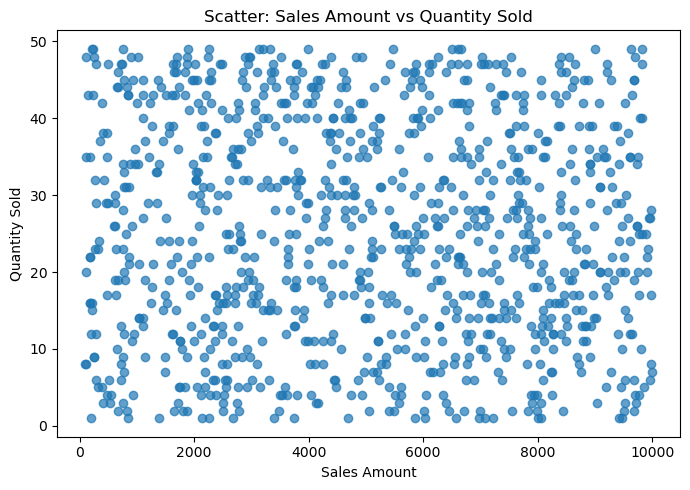

In [3]:
# Task 2: Scatter plot between quantity sold and sales amount
plt.figure(figsize=(7, 5))
plt.scatter(df["Sales_Amount"], df["Quantity_Sold"], alpha=0.7)
plt.title("Scatter: Sales Amount vs Quantity Sold")
plt.xlabel("Sales Amount")
plt.ylabel("Quantity Sold")
plt.tight_layout()
plt.show()


> **Task 3: Bar Plot**

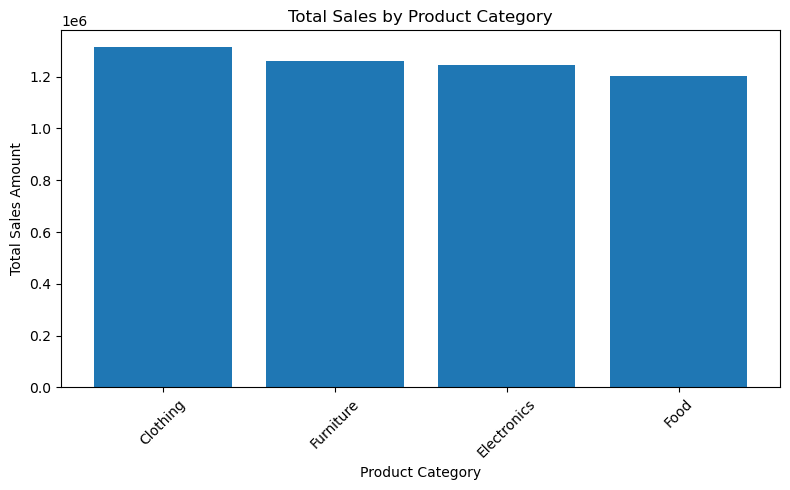

In [4]:
# Task 3: Bar Plot - Vertical
category_sales = df.groupby("Product_Category")["Sales_Amount"].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
plt.bar(category_sales.index, category_sales.values)
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

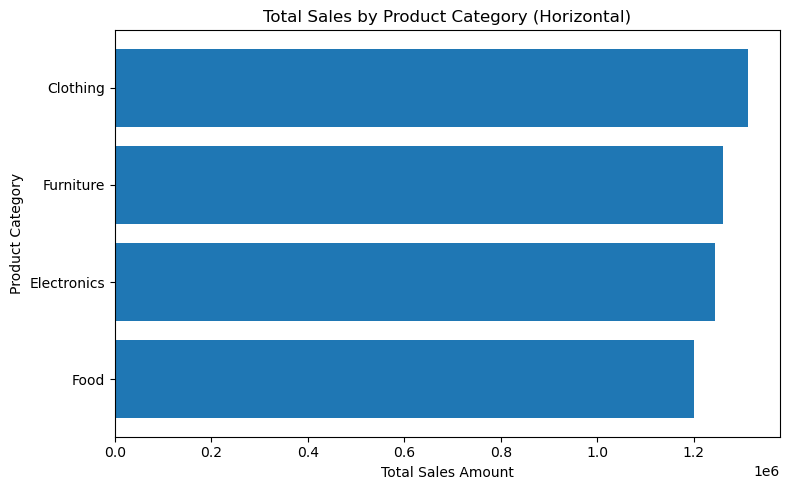

In [5]:
# Task 3: Bar Plot - Horizontal
category_sales = df.groupby("Product_Category")["Sales_Amount"].sum().sort_values(ascending=True)

plt.figure(figsize=(8, 5))
plt.barh(category_sales.index, category_sales.values)
plt.title("Total Sales by Product Category (Horizontal)")
plt.xlabel("Total Sales Amount")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()


> **Task 4: Multiple Bar Plot**

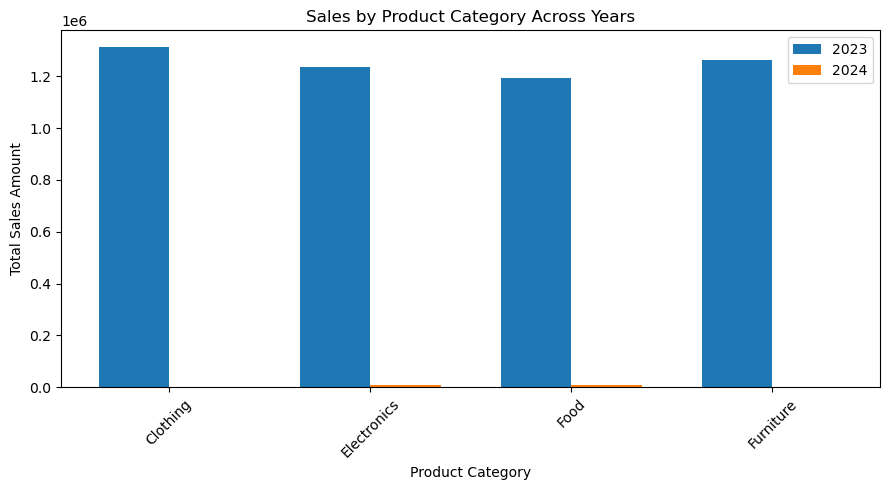

In [6]:
# Task 4: Multiple Bar Plot - Sales by Category across Years
df["Year"] = pd.to_datetime(df["Sale_Date"]).dt.year

pivot_year_category = (
    df.pivot_table(index="Product_Category", columns="Year", values="Sales_Amount", aggfunc="sum")
    .fillna(0)
    .sort_index()
)

x = range(len(pivot_year_category.index))
bar_width = 0.35

plt.figure(figsize=(9, 5))
years = list(pivot_year_category.columns)

for i, yr in enumerate(years):
    plt.bar([p + i * bar_width for p in x], pivot_year_category[yr], width=bar_width, label=str(yr))

plt.title("Sales by Product Category Across Years")
plt.xlabel("Product Category")
plt.ylabel("Total Sales Amount")
plt.xticks([p + (bar_width * (len(years) - 1) / 2) for p in x], pivot_year_category.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


> **Task 5: Stacked Bar Chart**

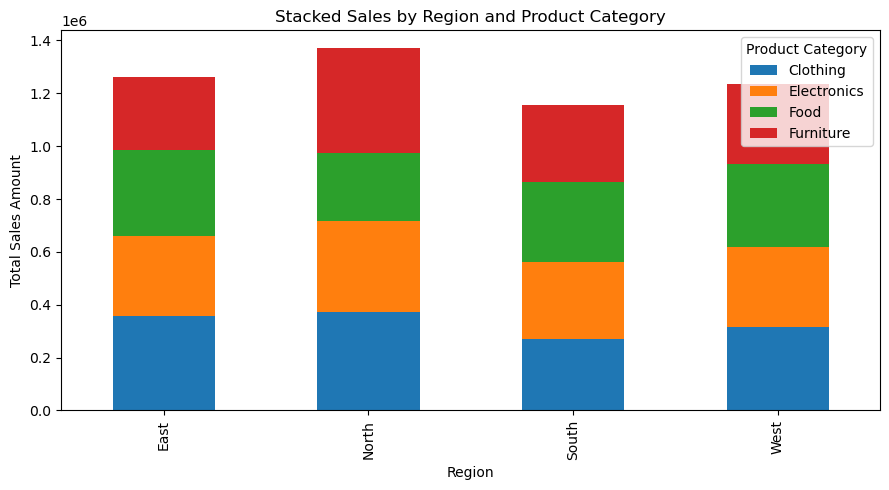

In [7]:
# Task 5: Stacked Bar Chart - Sales by Region and Category
region_category = (
    df.pivot_table(index="Region", columns="Product_Category", values="Sales_Amount", aggfunc="sum")
    .fillna(0)
)

region_category.plot(kind="bar", stacked=True, figsize=(9, 5))
plt.title("Stacked Sales by Region and Product Category")
plt.xlabel("Region")
plt.ylabel("Total Sales Amount")
plt.legend(title="Product Category")
plt.tight_layout()
plt.show()


> **Task 6: Histogram (Marks Distribution)**

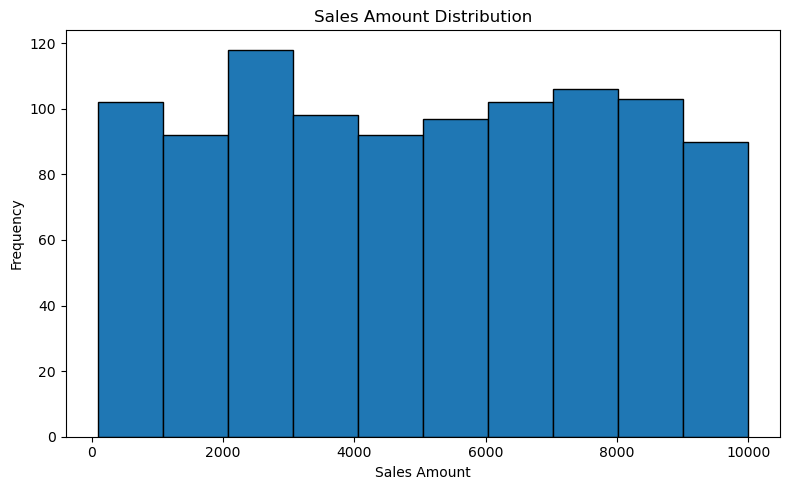

In [8]:
# Task 6: Histogram - Sales Amount Distribution
plt.figure(figsize=(8, 5))
plt.hist(df["Sales_Amount"], bins=10, edgecolor="black")
plt.title("Sales Amount Distribution")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


> **Task 7: Pie Chart (Marked Share)**

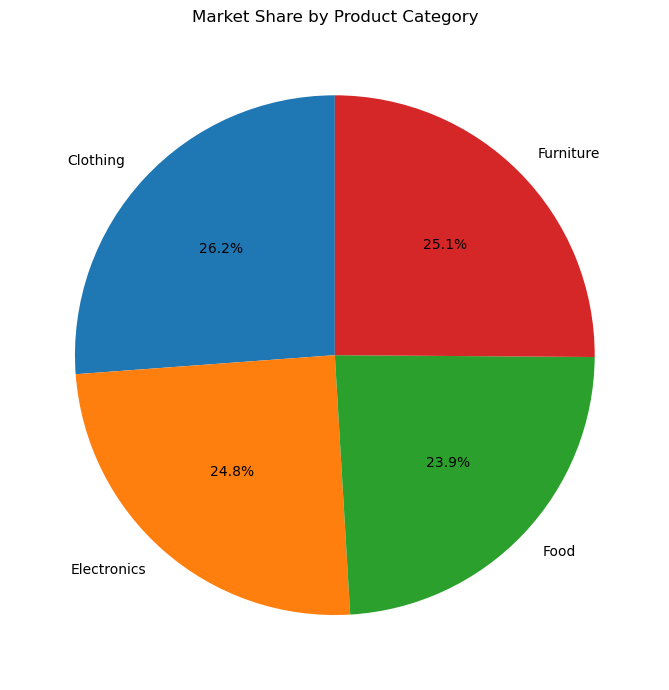

In [9]:
# Task 7: Pie Chart - Category Share by Sales Amount
category_share = df.groupby("Product_Category")["Sales_Amount"].sum()

plt.figure(figsize=(7, 7))
plt.pie(category_share, labels=category_share.index, autopct="%1.1f%%", startangle=90)
plt.title("Market Share by Product Category")
plt.tight_layout()
plt.show()
